# Chapter 16. 이미지 인식의 꽃, 컨볼루션 신경망(CNN)




In [1]:
import sys
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

print(f"python: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"sklearn: {sklearn.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborn: {sns.__version__}")
print(f"tensorflow: {tf.__version__}")

python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
numpy: 1.25.2
pandas: 1.5.3
sklearn: 1.2.2
matplotlib: 3.7.1
seaborn: 0.13.1
tensorflow: 2.15.0


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


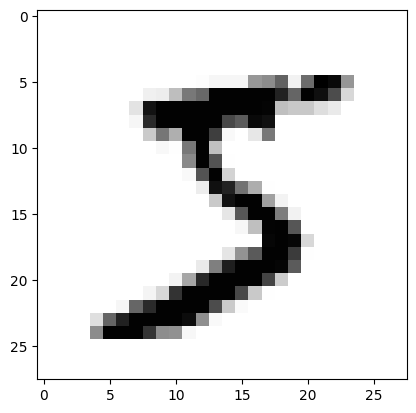

In [3]:
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [4]:
X_train[0].shape

(28, 28)

In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

데이터를 0에서 1사이의 값으로 변환한 후 구동할 때 최적의 성능

In [6]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

print("class : %d " % (y_train[0]))

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

modelpath="./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18879, saving model to ./MNIST_MLP.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.18879 to 0.13445, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13445 to 0.10996, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.10996 to 0.10259, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.10259 to 0.09475, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09475 to 0.09316, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.09316 to 0.08527, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08527

Epoch 9: val_loss improved from 0.08527 to 0.08402, saving model to ./MNIST_MLP.hdf5

Epoch 10: val_loss improved from 0.08402 to 0.08094, saving model to ./MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08094

Epoch 12: val_loss improved from 0.08094 to 0.08020, saving model to ./MNIST_MLP.hdf5

Epoch 13: val_loss did not improve from 0.08020

Epoch 14: val_loss did not improve from 0.08020

Epoch 15: val_loss did not i

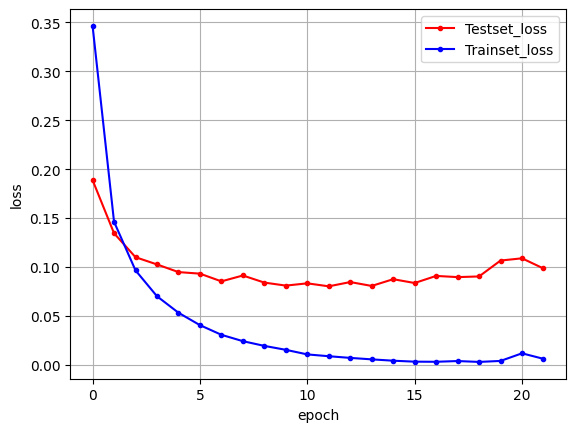

In [9]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

노드가 많아지거나 층이 많아진다고 해서 학습이 무조건 좋아지는 것은 아님 -> 과적합

딥러닝에서 학습을 진행할 때 가장 중요한 것은 과적합을 얼마나 효과적으로 피해가는지에 달려있다고 해도 과언이 아님

그 방법 중 효과가 큰 기법 드롭아웃

드롭아웃은 은닉층에 배치된 노드 중 일부를 임의로 꺼 주는 것

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train.shape: {X_train.shape}")

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
print(f"X_train.shape: {X_train.shape}")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train.shape: (60000, 28, 28)
X_train.shape: (60000, 28, 28, 1)


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelpath="./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.07766, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07766 to 0.05657, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05657 to 0.04694, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.04694 to 0.04514, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04514 to 0.04172, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04172

Epoch 7: val_loss did not improve from 0.04172

Epoch 8: val_loss improved from 0.04172 to 0.04029, saving model to ./MNIST_CNN.hdf5

Epoch 9: val_loss did not improve from 0.04029

Epoch 10: val_loss did not improve from 0.04029

Epoch 11: val_loss did not improve from 0.04029

Epoch 12: val_loss did not improve from 0.04029

Epoch 13: val_loss did not improve from 0.04029

Epoch 14: val_loss did not improve from 0.04029

Epoch 15: val_loss did not improve from 0.04029

Epoch 16: val_loss did not improve from 0.04029



In [13]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0313 - accuracy: 0.9908

 Test Accuracy: 0.9908
